# Comparative Analysis
In this notebook, we compare ClaSP with different window size detection techniques.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "f1_score"

Let's load the scores from the different methods.

In [4]:
wsd = ["Human", "FFT", "ACF", "SuSS", "MWF", "Autoperiod", "RobustPeriod"] # 

methods = list()

for algo in wsd:
    candidate_name = f"clasp_{algo}"
    methods.append((algo, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/segmentation/clasp/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df[eval_score]
    
df_scores

,name,Human,FFT,ACF,SuSS,MWF,Autoperiod,RobustPeriod
0,Adiac,1.000,0.500,0.500,0.500,0.500,0.500,1.000
1,ArrowHead,1.000,1.000,0.500,1.000,1.000,1.000,1.000
2,Beef,0.500,0.500,0.667,0.500,0.667,0.500,0.500
3,BeetleFly,1.000,0.500,0.667,0.500,0.500,0.500,0.500
4,BirdChicken,1.000,0.500,0.667,1.000,1.000,0.500,0.500
5,Car,0.750,0.750,0.750,0.750,0.750,0.750,0.750
6,CBF,1.000,0.400,0.400,0.400,0.000,0.400,0.500
7,ChlorineConcentration,1.000,0.500,0.500,0.500,0.500,0.500,0.500
8,CinCECGTorso,1.000,0.333,0.500,0.333,0.400,0.400,0.000
9,Coffee,1.000,1.000,1.000,1.000,1.000,1.000,0.500


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2403/3665851733.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0)


Human           0.885012
FFT             0.780000
ACF             0.691181
SuSS            0.757096
MWF             0.729386
Autoperiod      0.706349
RobustPeriod    0.693012
dtype: float64

In [6]:
df_scores.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2403/2176364554.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0)


Human           0.201007
FFT             0.249677
ACF             0.255222
SuSS            0.254480
MWF             0.292705
Autoperiod      0.285599
RobustPeriod    0.309036
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

Human:wins=72 rank=1.3494
FFT:wins=50 rank=1.84337
ACF:wins=36 rank=2.80723
SuSS:wins=49 rank=2.10843
MWF:wins=45 rank=2.20482
Autoperiod:wins=40 rank=2.48193
RobustPeriod:wins=42 rank=2.86747


Let's plot and output the ranks.

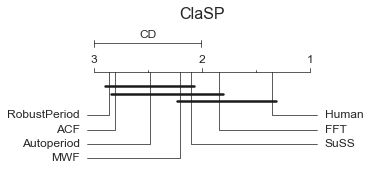

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, highv=3, width=5, reverse=True, textspace=1, ) # filename="../tmp/comparative-analysis.pdf"
plt.title("ClaSP", fontsize=16)
plt.savefig(f"../tmp/cd_clasp.pdf", bbox_inches="tight")
plt.show()

Let's compute wins/losses against ClaSP.

In [10]:
selection = "SuSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

SuSS vs Human: (wins/ties/losses): 4/50/29
SuSS vs FFT: (wins/ties/losses): 9/61/13
SuSS vs ACF: (wins/ties/losses): 22/46/15
SuSS vs MWF: (wins/ties/losses): 14/57/12
SuSS vs Autoperiod: (wins/ties/losses): 19/54/10
SuSS vs RobustPeriod: (wins/ties/losses): 23/47/13


No handles with labels found to put in legend.


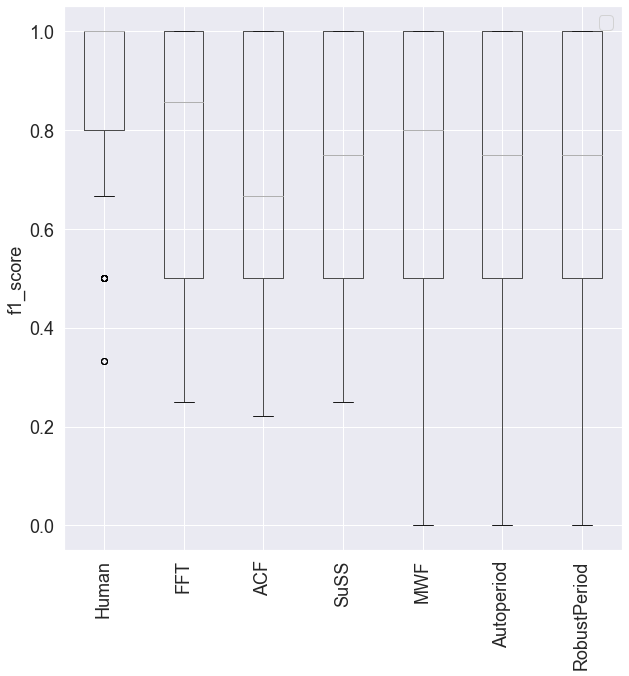

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

ax.legend(prop={'size': fontsize})

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
# plt.savefig(f"../tmp/comparative_analysis_boxplot.pdf", bbox_inches="tight") 

In [12]:
window_sizes = pd.read_csv("../experiments/segmentation/window_sizes.csv")

0.25: 0.42517856581637076
0.5: 0.557358279099637
0.75: 0.8188772560451865


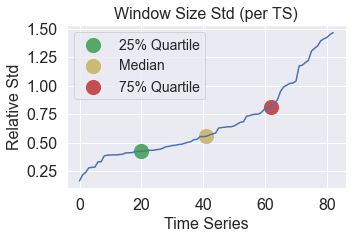

In [13]:
font_size = 16
_, ax = plt.subplots(figsize=(5,3))

var = []

for idx, row in window_sizes.iterrows():
    w = row.iloc[2:].to_numpy()
    w = w[w != -1]
    
    # w = np.concatenate((w, [10000, 10000]))
    # w = (w - w.min()) / (w.max() - w.min())
    
    var.append(np.std(w) / np.mean(w))
    
var = np.sort(np.array(var))
    
plt.plot(np.arange(len(var)), var)

ax.set_title(f"Window Size Std (per TS)", fontsize=font_size)
ax.set_xlabel('Time Series', fontsize=font_size)
ax.set_ylabel("Relative Std", fontsize=font_size)

for n, c, q in zip(["25% Quartile", "Median", "75% Quartile"], "gyr", (.25, .5, .75)):
    pos = int(var.shape[0] * q)
    ax.scatter(pos, var[pos], marker="o", color=c, s=200, label=n)
    print(f"{q}: {var[pos]}")

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
ax.legend(prop={'size': int(font_size * .9) })
# plt.savefig(f"../tmp/seg_ws_dis.pdf", bbox_inches="tight") 
plt.show()

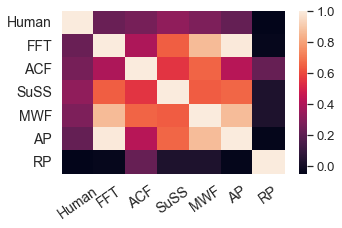

In [14]:
font_size = 14
_, ax = plt.subplots(figsize=(5,3))

from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr

W = [window_sizes.iloc[:,i].to_numpy() for i in range(2,window_sizes.columns.shape[0])]
L = list(window_sizes.columns[2:])

for idx, l in enumerate(L):
    if l == "Autoperiod":
        L[idx] = "AP"
    if l == "RobustPeriod":
        L[idx] = "RP"

corr = pairwise_distances(W, metric=lambda x,y: pearsonr(x,y)[0])

sns.set(font_scale=1.2)
ax = sns.heatmap(corr)

ax.set_xticklabels(L, rotation=35, fontsize=font_size)
ax.set_yticklabels(L, rotation=0, fontsize=font_size)

plt.savefig(f"../tmp/seg_corr.pdf", bbox_inches="tight") 
plt.show()

#### 